Marketing Campaign Dataseti 

Context
Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Content
Attributes

People

ID: Customer's unique identifier
Year_Birth: Customer's birth year
Education: Customer's education level
Marital_Status: Customer's marital status
Income: Customer's yearly household income
Kidhome: Number of children in customer's household
Teenhome: Number of teenagers in customer's household
Dt_Customer: Date of customer's enrollment with the company
Recency: Number of days since customer's last purchase
Complain: 1 if the customer complained in the last 2 years, 0 otherwise
Products

MntWines: Amount spent on wine in last 2 years
MntFruits: Amount spent on fruits in last 2 years
MntMeatProducts: Amount spent on meat in last 2 years
MntFishProducts: Amount spent on fish in last 2 years
MntSweetProducts: Amount spent on sweets in last 2 years
MntGoldProds: Amount spent on gold in last 2 years
Promotion

NumDealsPurchases: Number of purchases made with a discount
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
Place

NumWebPurchases: Number of purchases made through the company’s website
NumCatalogPurchases: Number of purchases made using a catalogue
NumStorePurchases: Number of purchases made directly in stores
NumWebVisitsMonth: Number of visits to company’s website in the last month

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset with proper separator
data = pd.read_csv("marketing_campaign.csv", sep="\t")

# Display the first few rows of the dataset
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

Exploring and Filling Missing Values:


In [10]:
# Checking for missing values
missing_data = data.isnull().sum()
print(missing_data)

# Verifying if there are any missing values left
data.isnull().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [15]:
# Filling missing values
# "Income" column can be filled with median
# "Income" median according to the education income median
education_income_median = data.groupby('Education')['Income'].median()

# "Income" median according to the marital income median
marital_income_median = data.groupby('Marital_Status')['Income'].median()

# "Income" median according to the age income median
data['Age'] = 2024 - data['Year_Birth']
age_income_median = data.groupby('Age')['Income'].median()

# Filling missing values with appropriate medians
for index, row in data.iterrows():
    if np.isnan(row['Income']):
        education = row['Education']
        marital_status = row['Marital_Status']
        age = row['Age']
        if not np.isnan(education_income_median[education]):
            data.at[index, 'Income'] = education_income_median[education]
        elif not np.isnan(marital_income_median[marital_status]):
            data.at[index, 'Income'] = marital_income_median[marital_status]
        elif not np.isnan(age_income_median[age]):
            data.at[index, 'Income'] = age_income_median[age]
        else:
            data.at[index, 'Income'] = data['Income'].median()
            
data.isnull().sum()



ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
dtype: int64

Bar Plot:

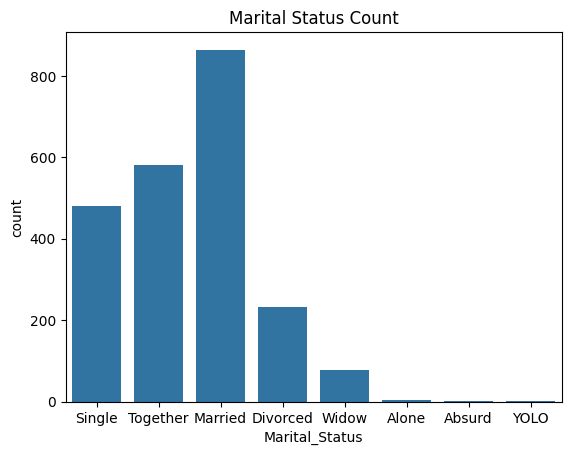

In [16]:
# Count plot for Marital_Status
sns.countplot(data=data, x='Marital_Status')
plt.title('Marital Status Count')
plt.show()


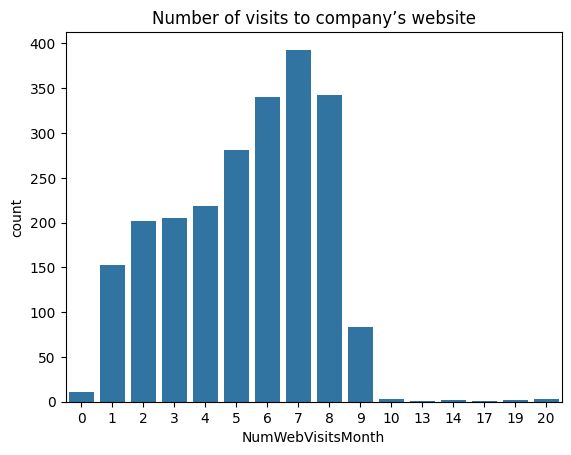

In [35]:
# Count plot for NumWebVisitsMonth
sns.countplot(data=data, x='NumWebVisitsMonth')
plt.title('Number of visits to company’s website')
plt.show()

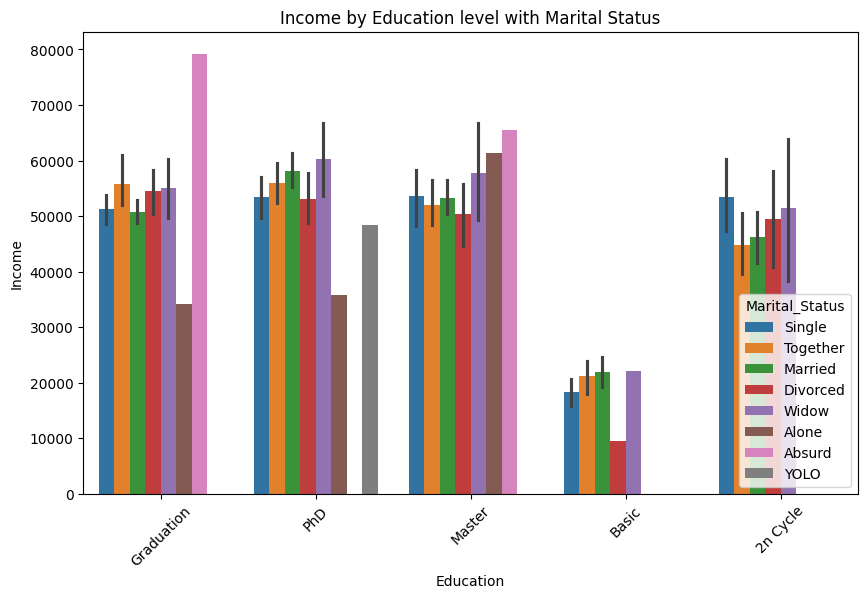

In [78]:
# Bar plot for Income by Education level with hue
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Education', y='Income', hue='Marital_Status')
plt.title('Income by Education level with Marital Status')
plt.xticks(rotation=45)
plt.show()


Box Plot:


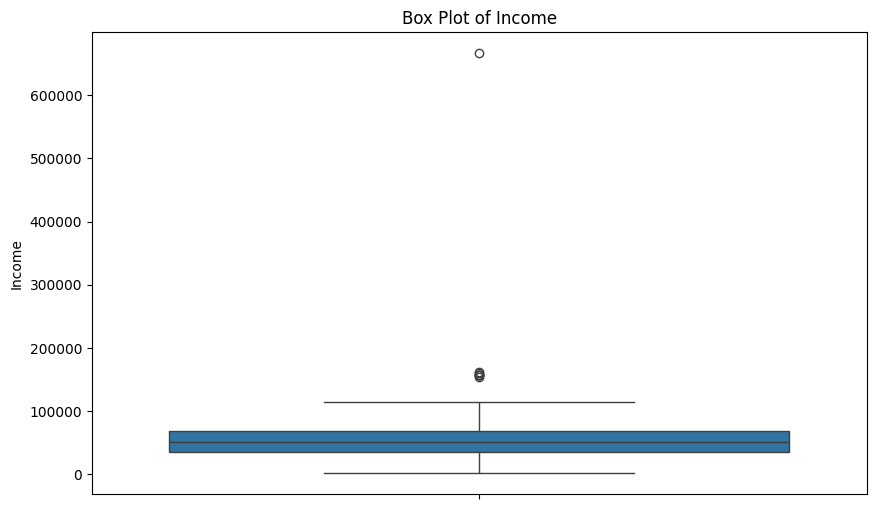

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['Income'])
plt.title('Box Plot of Income')
plt.xticks(rotation=45)
plt.show()


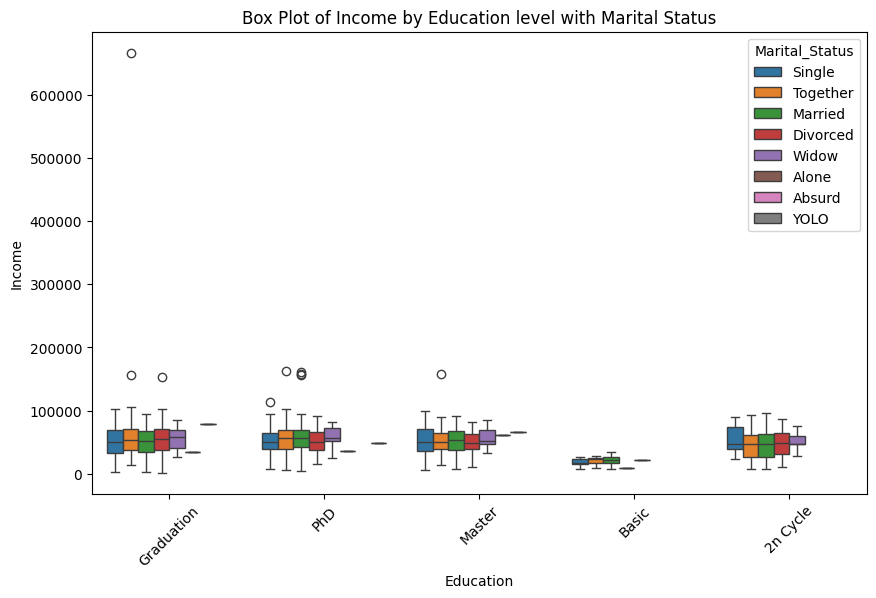

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Education', y='Income', hue='Marital_Status')
plt.title('Box Plot of Income by Education level with Marital Status')
plt.xticks(rotation=45)
plt.show()


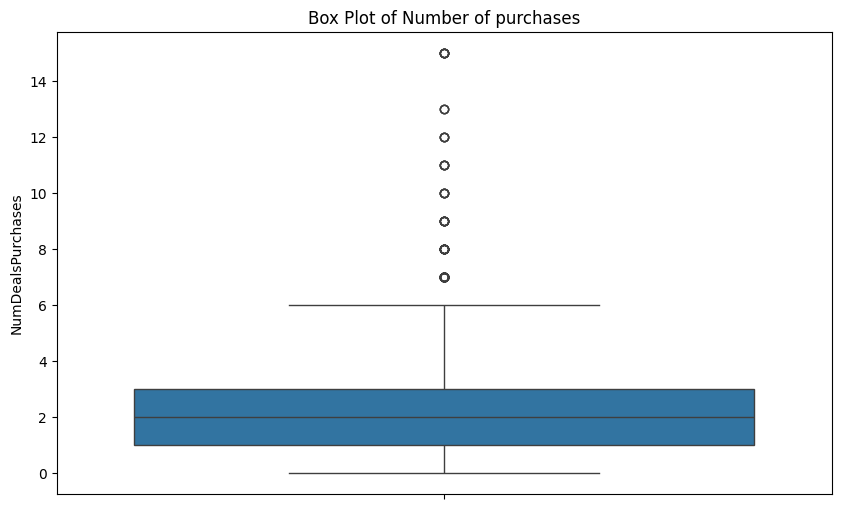

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['NumDealsPurchases'])
plt.title('Box Plot of Number of purchases')
plt.xticks(rotation=45)
plt.show()


Histogram:


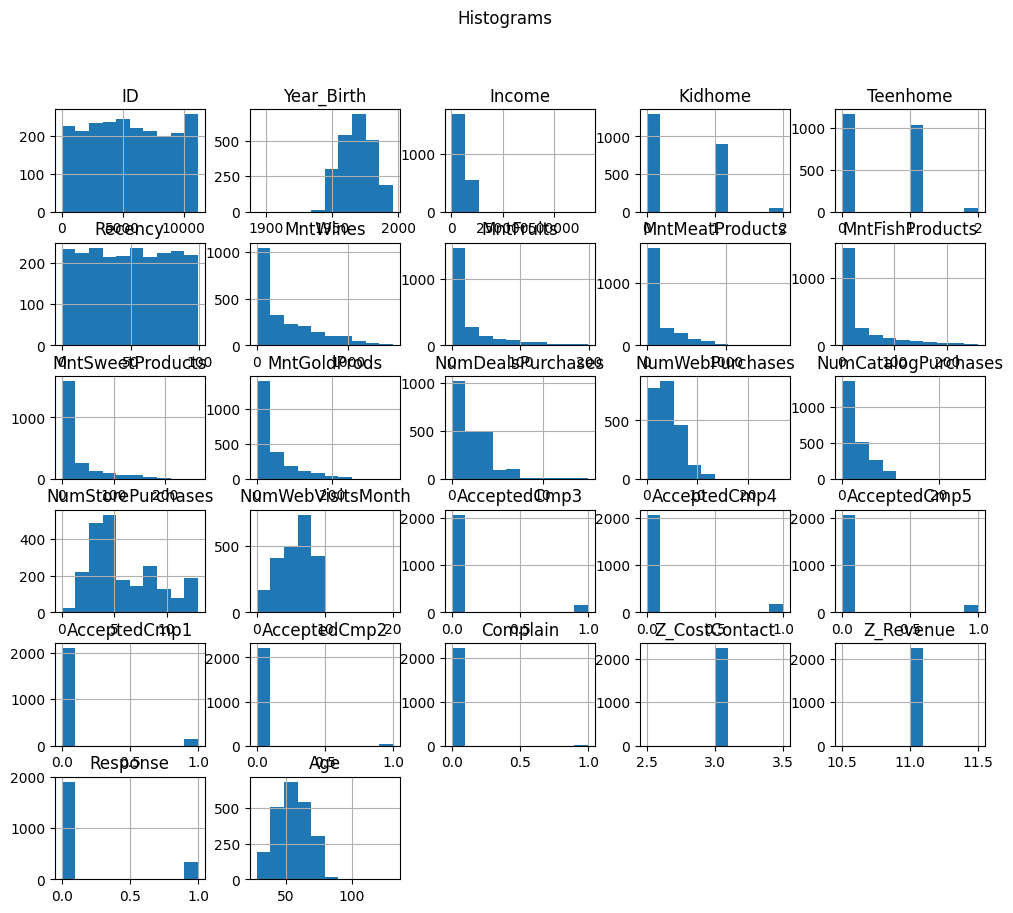

In [18]:
# Histogram
data.hist(figsize=(12, 10))
plt.suptitle("Histograms")
plt.show()


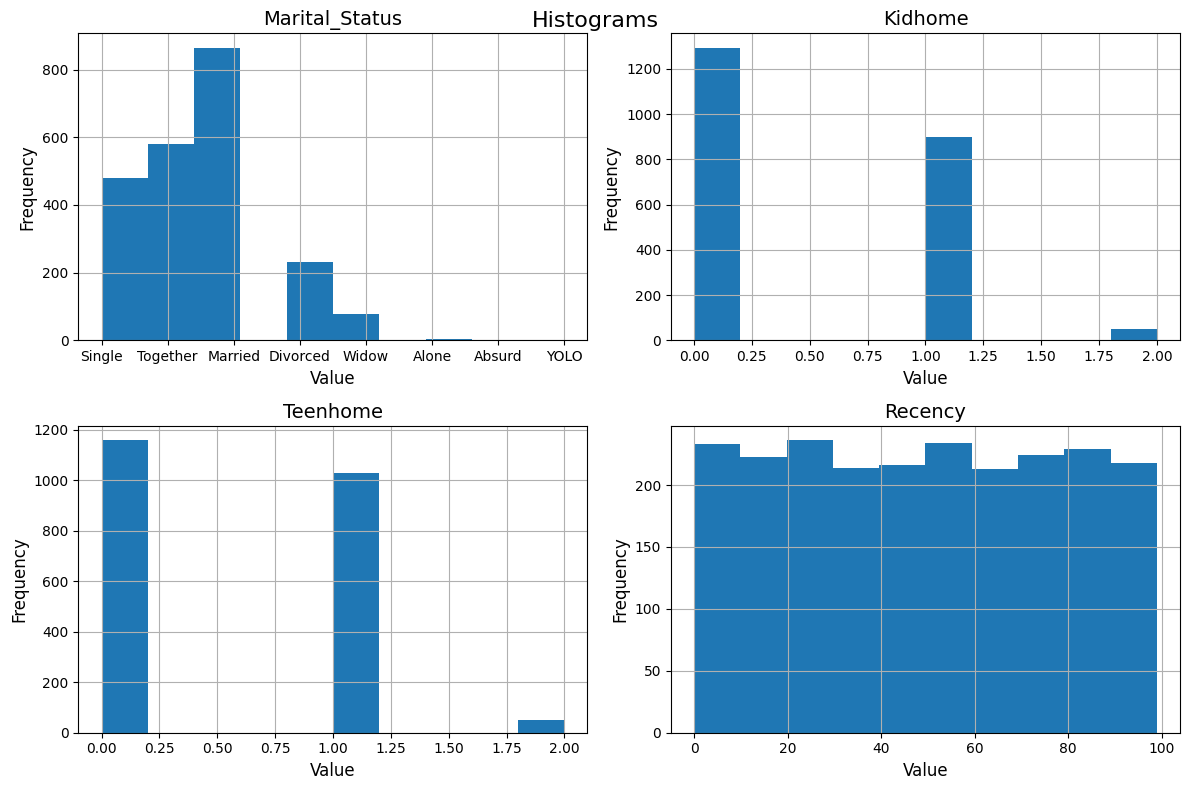

In [47]:
# Histogram
plt.figure(figsize=(12, 8))
selected_columns = ['Marital_Status', 'Kidhome', 'Teenhome','Recency']

for i, column in enumerate(selected_columns):
    plt.subplot(2, 2, i+1)  # 2x2'lik bir grid oluşturarak her bir histogramı yerleştirin
    data[column].hist()
    plt.title(column, fontsize=14)  # Her histogramın başlığını özellik ismiyle ayarlayın
    plt.xlabel('Value', fontsize=12)  # X ekseni etiketi
    plt.ylabel('Frequency', fontsize=12)  # Y ekseni etiketi
    plt.xticks(fontsize=10)  # X eksenindeki ticklerin boyutunu ayarlayın
    plt.yticks(fontsize=10)  # Y eksenindeki ticklerin boyutunu ayarlayın

plt.tight_layout()  # Otomatik olarak subplotlar arasındaki boşluğu ayarlayın
plt.suptitle("Histograms", fontsize=16)  # Ana başlık
plt.show()


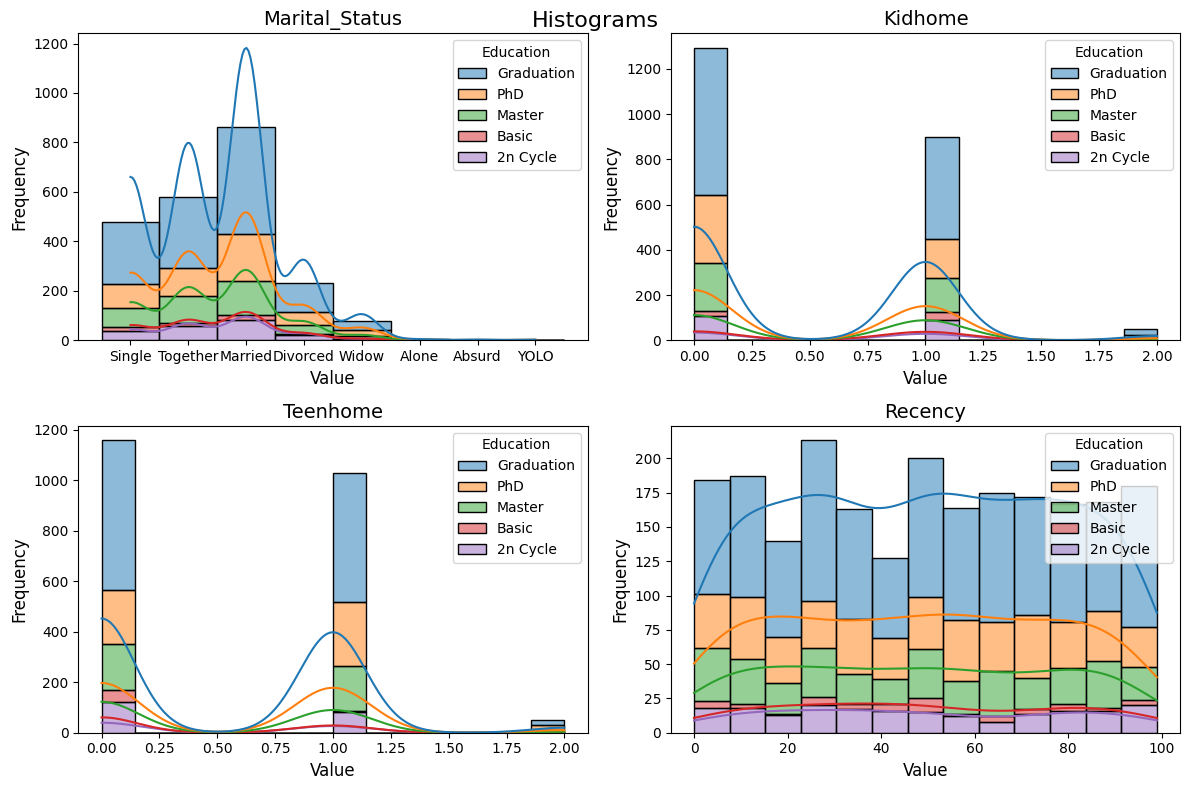

In [80]:
plt.figure(figsize=(12, 8))
selected_columns = ['Marital_Status', 'Kidhome', 'Teenhome', 'Recency']

for i, column in enumerate(selected_columns):
    plt.subplot(2, 2, i+1)  
    sns.histplot(data=data, x=column, hue='Education', multiple='stack', kde=True)
    plt.title(column, fontsize=14)  
    plt.xlabel('Value', fontsize=12)  
    plt.ylabel('Frequency', fontsize=12)  
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)  

plt.tight_layout()  
plt.suptitle("Histograms", fontsize=16) 
plt.show()


Violin Plot:


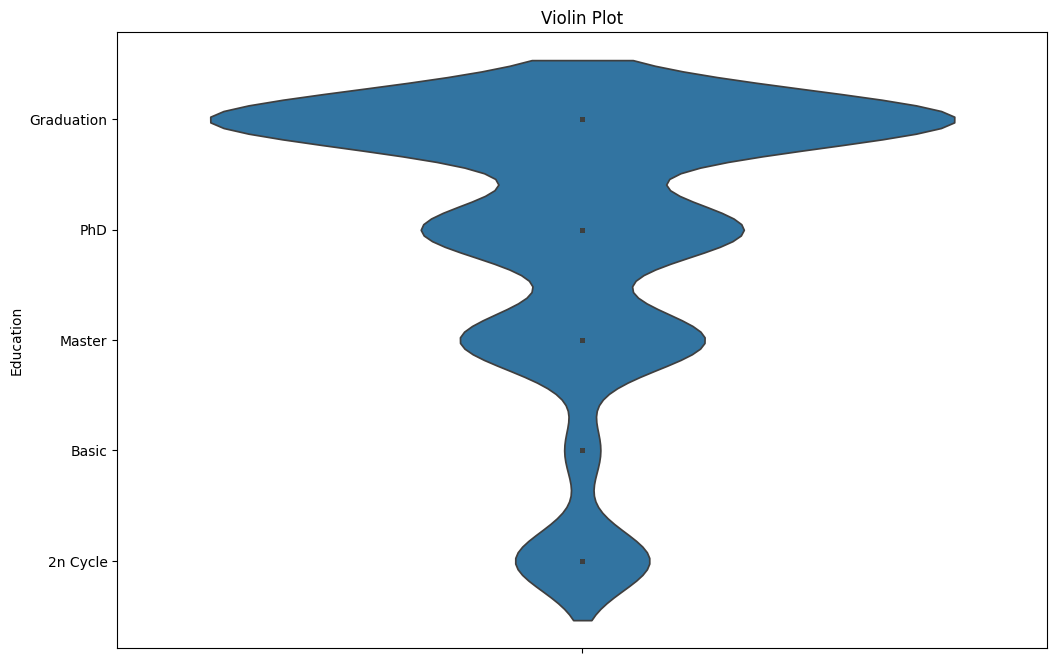

In [49]:
# Violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=data['Education'], inner="points")
plt.title('Violin Plot')
plt.xticks(rotation=45)
plt.show()


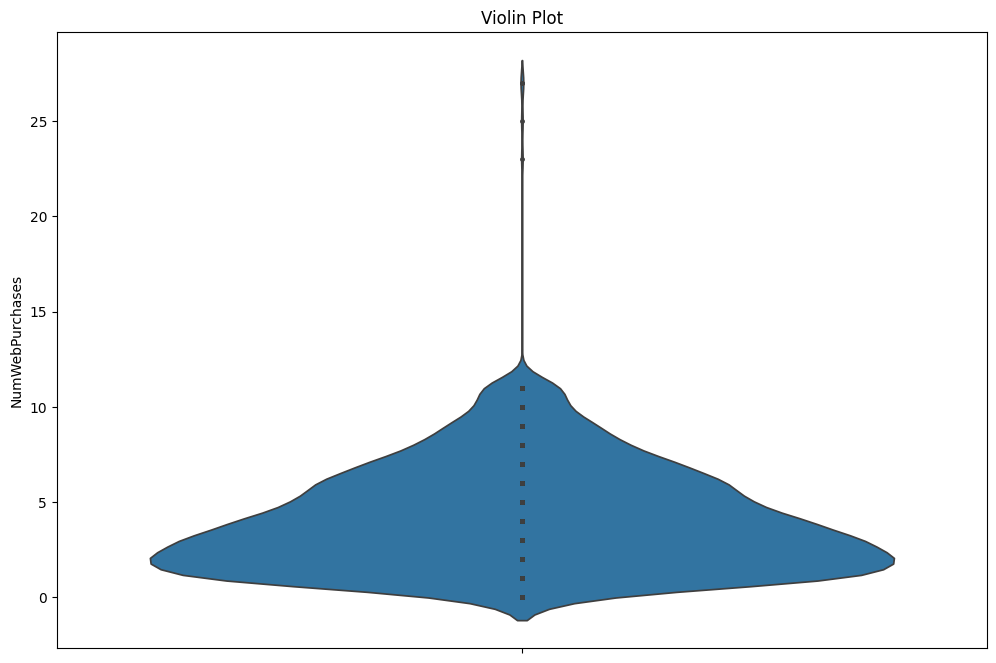

In [50]:
# Violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=data['NumWebPurchases'], inner="points")
plt.title('Violin Plot')
plt.xticks(rotation=45)
plt.show()

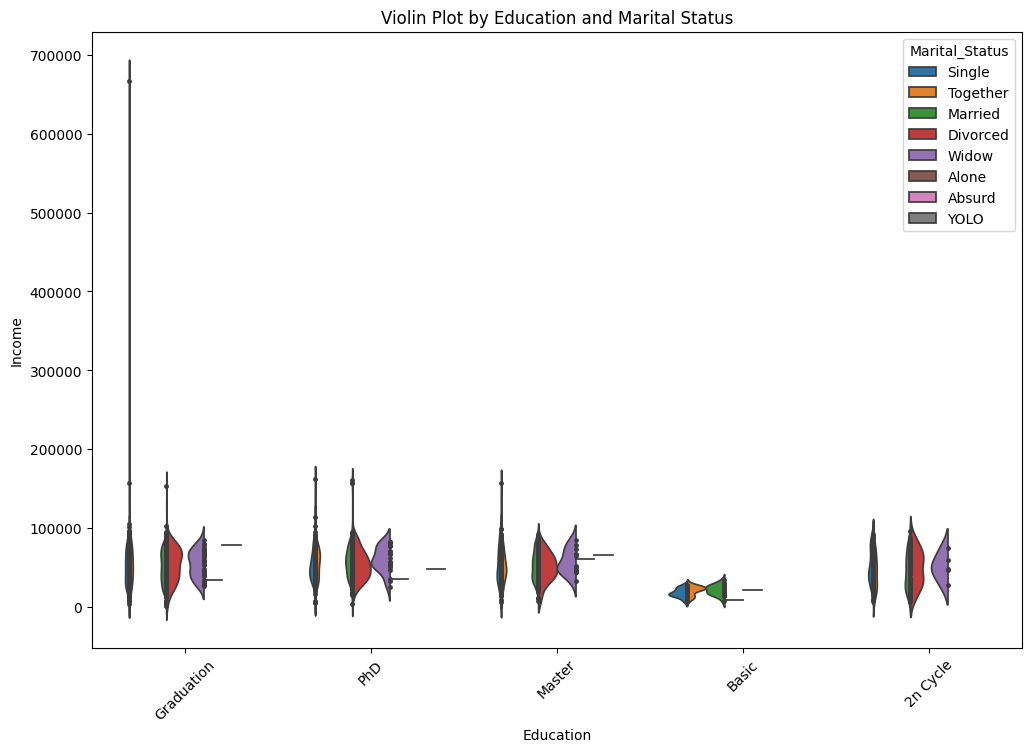

In [81]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=data, x='Education', y='Income', inner="points", hue='Marital_Status', split=True)
plt.title('Violin Plot by Education and Marital Status')
plt.xticks(rotation=45)
plt.show()


Scatter Plot:


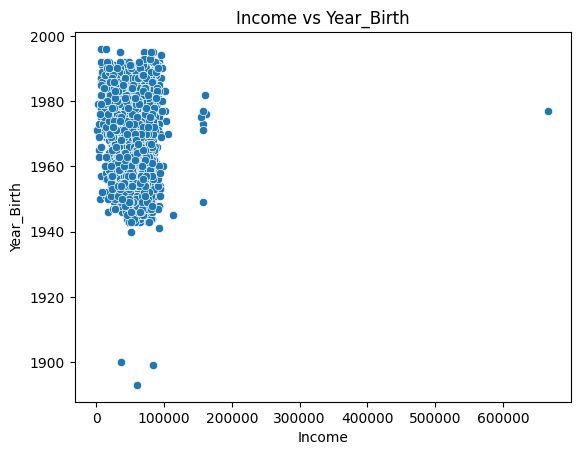

In [63]:
sns.scatterplot(data=data, x='Income', y='Year_Birth')
plt.title('Income vs Year_Birth')
plt.xlabel('Income')
plt.ylabel('Year_Birth')
plt.show()



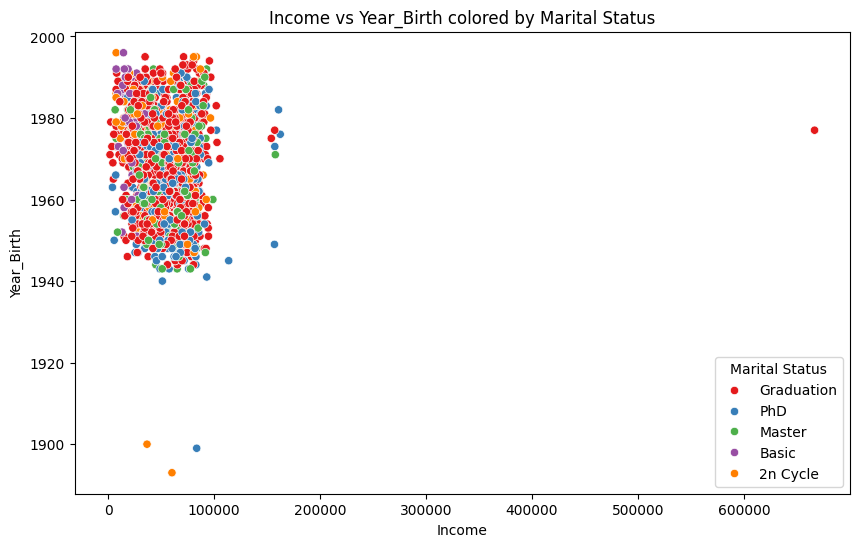

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Income', y='Year_Birth', hue='Education', palette='Set1')
plt.title('Income vs Year_Birth colored by Education')
plt.xlabel('Income')
plt.ylabel('Year_Birth')
plt.legend(title='Marital Status')
plt.show()


Scatter Plot Matrix:


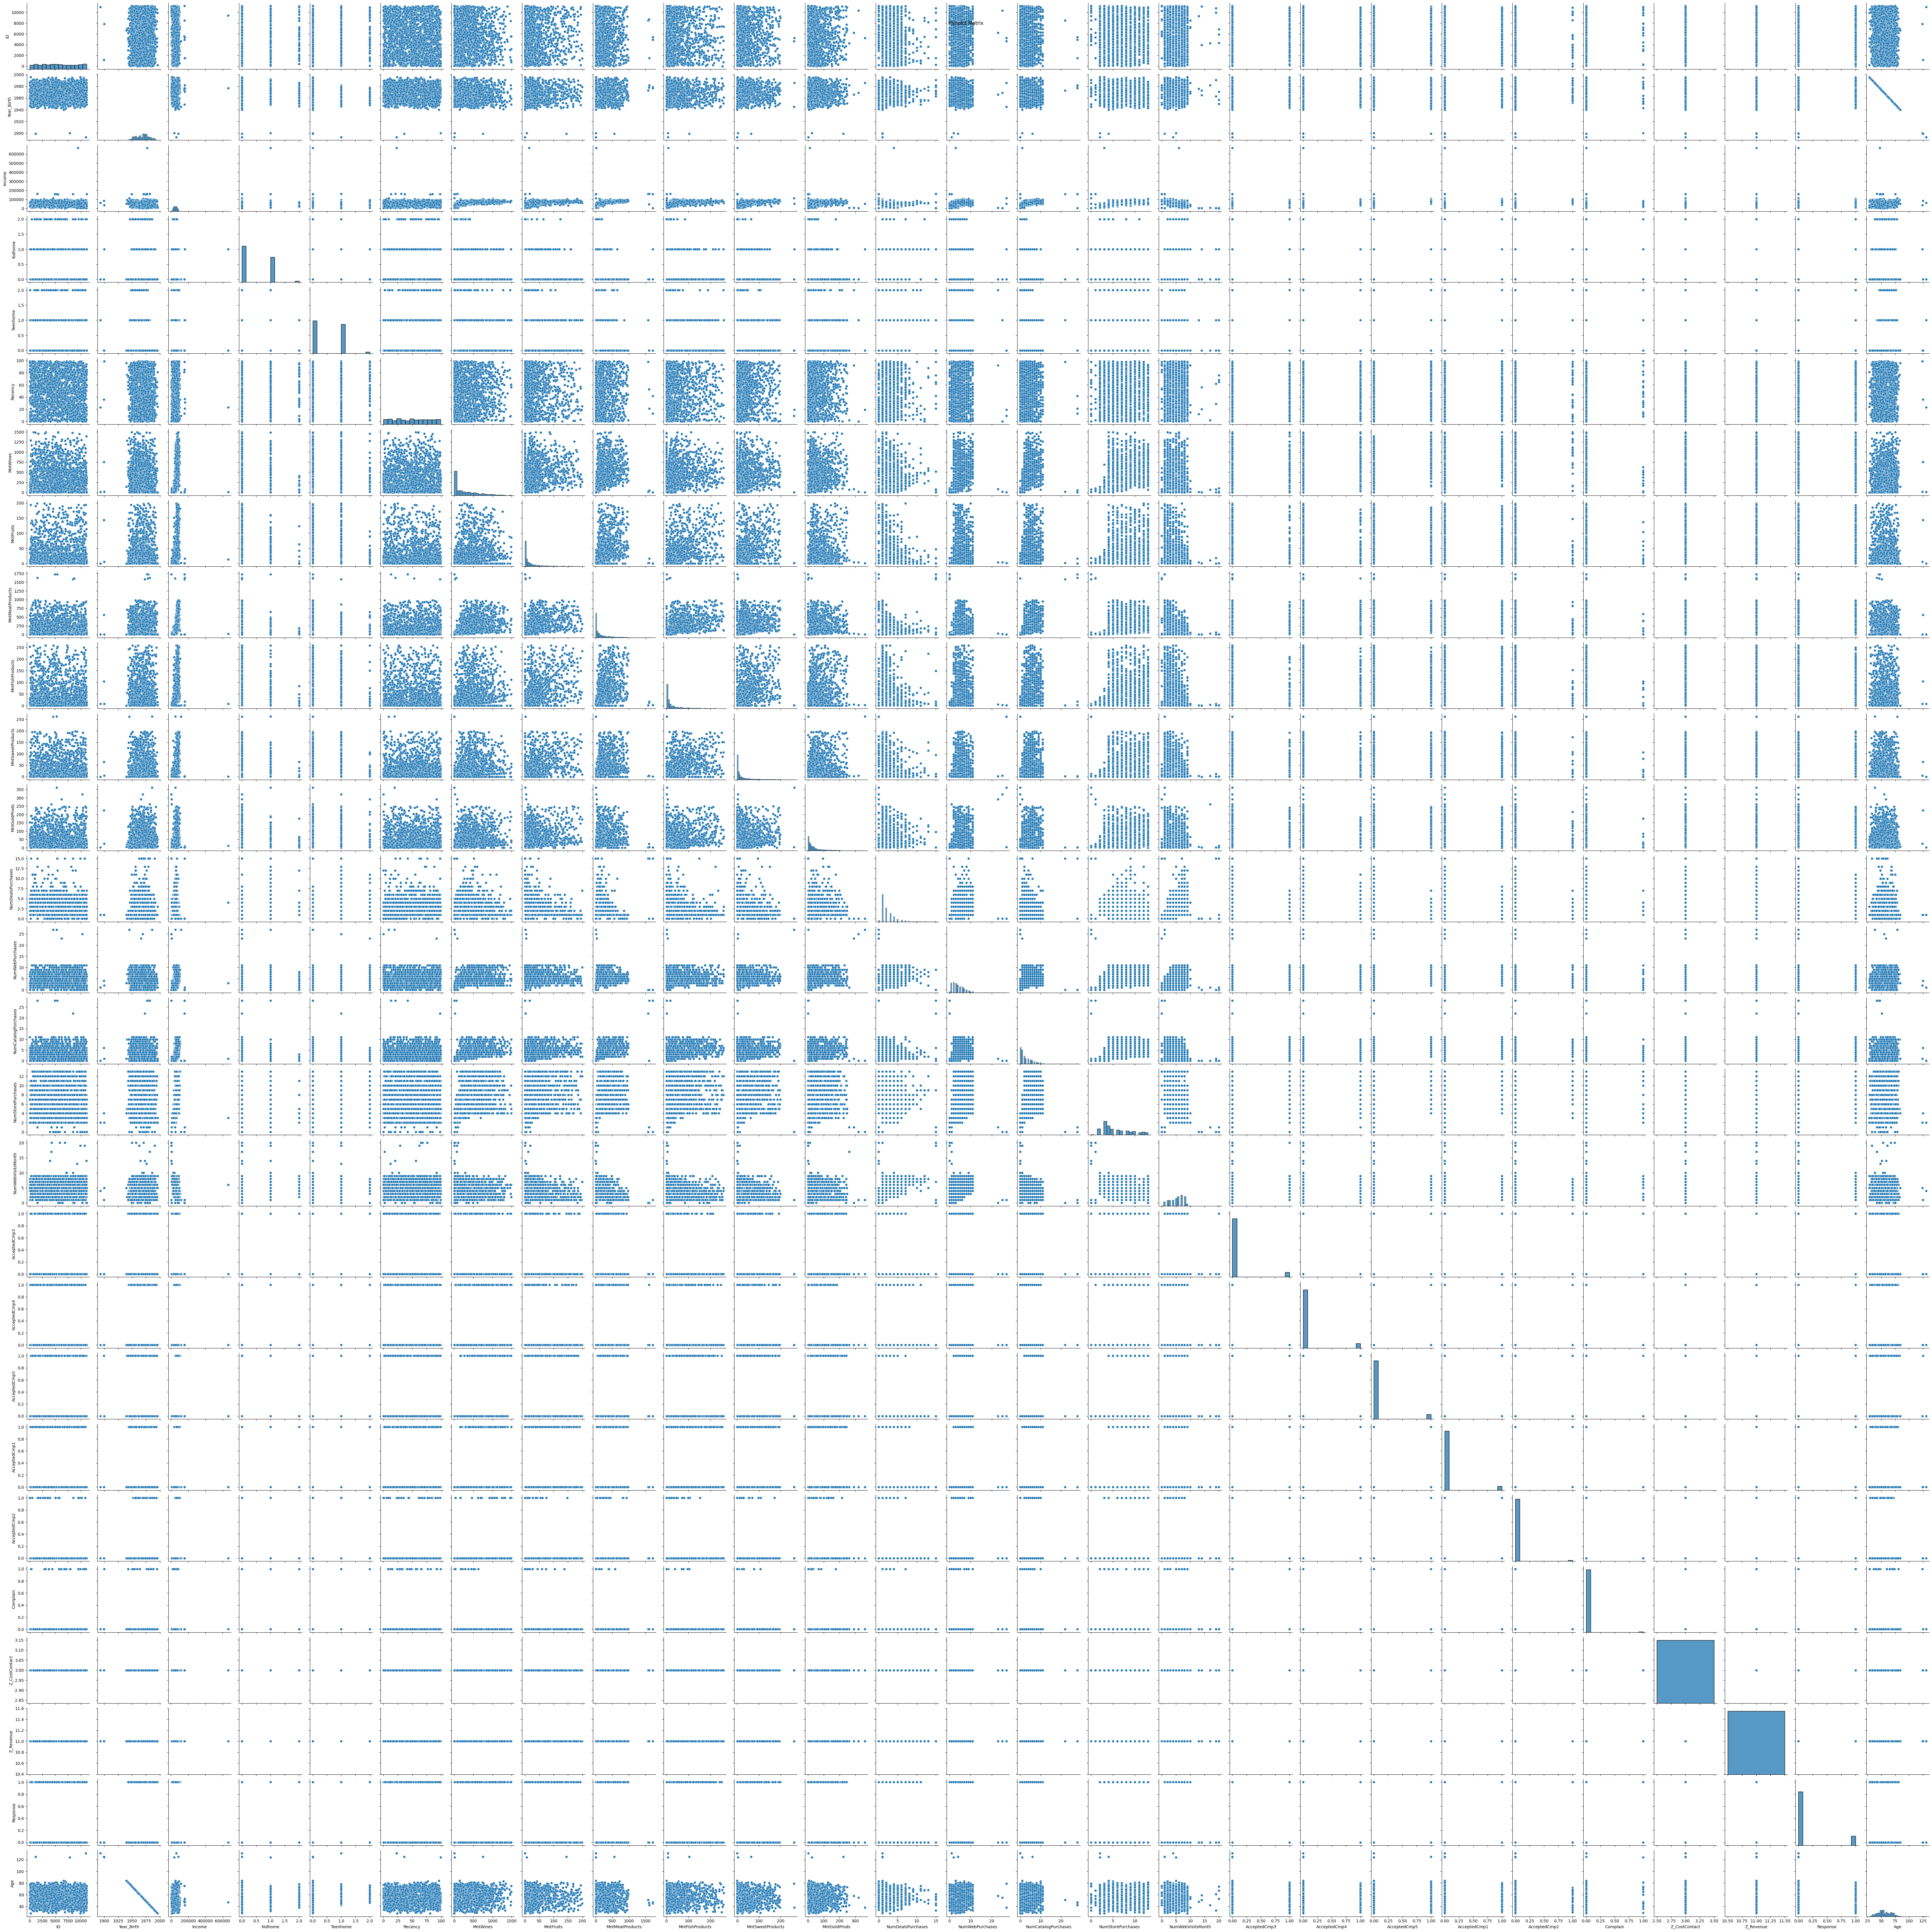

In [64]:
# Scatter plot matrix
sns.pairplot(data=data)
plt.suptitle("Pairplot Matrix")
plt.show()


Heatmap:


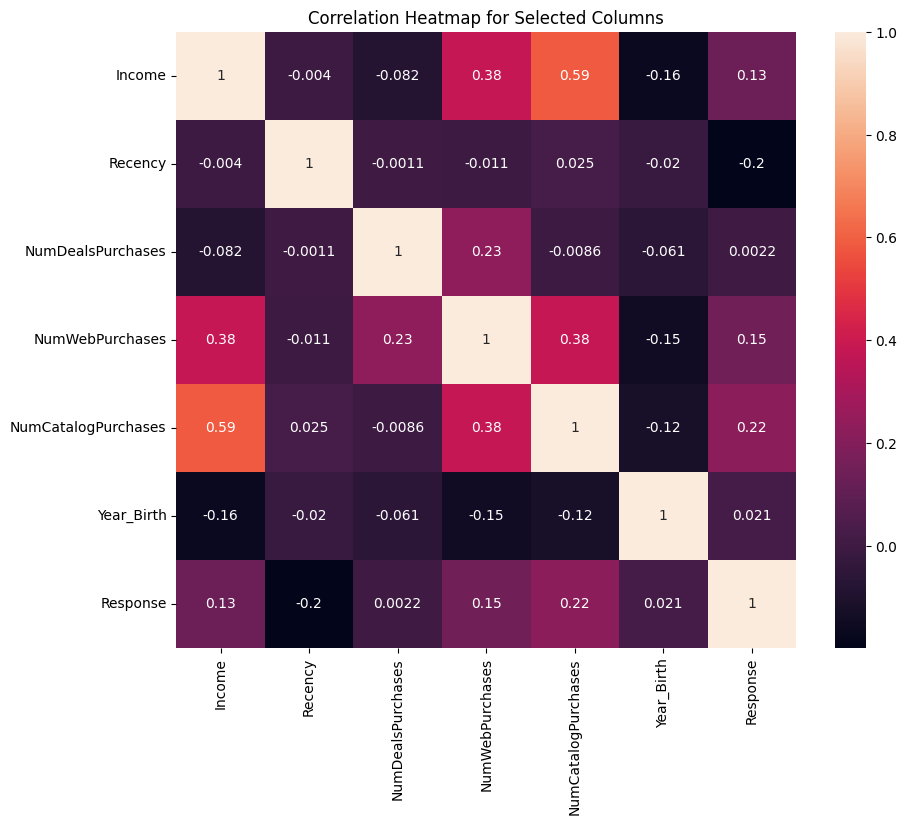

In [74]:
selected_columns = ['Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases','Year_Birth', 'Response']
selected_data = data[selected_columns]
plt.figure(figsize=(10, 8))
sns.heatmap(selected_data.corr(), annot=True)
plt.title('Correlation Heatmap for Selected Columns')
plt.show()



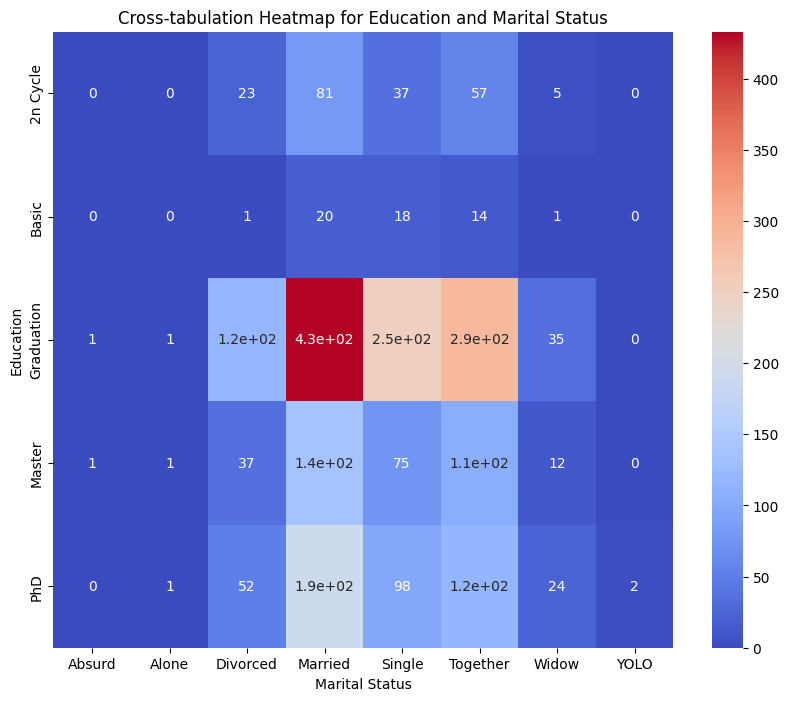

In [76]:
cross_tab = pd.crosstab(data['Education'], data['Marital_Status'])
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm')
plt.title('Cross-tabulation Heatmap for Education and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Education')
plt.show()

Line Plot:


<Axes: xlabel='Year_Birth', ylabel='Income'>

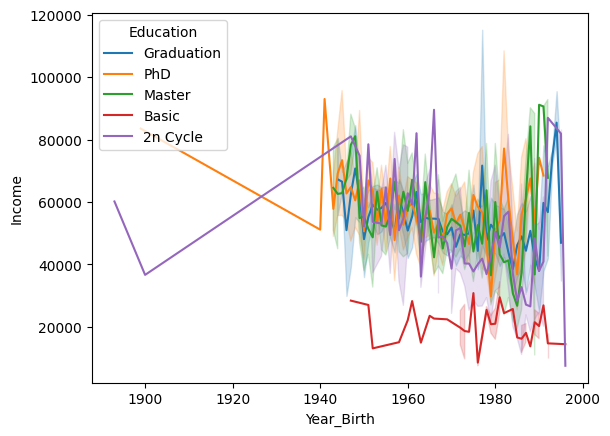

In [72]:
# Line plot for Income by Year_Birth

sns.lineplot(data=data, x='Year_Birth', y='Income', hue='Education')



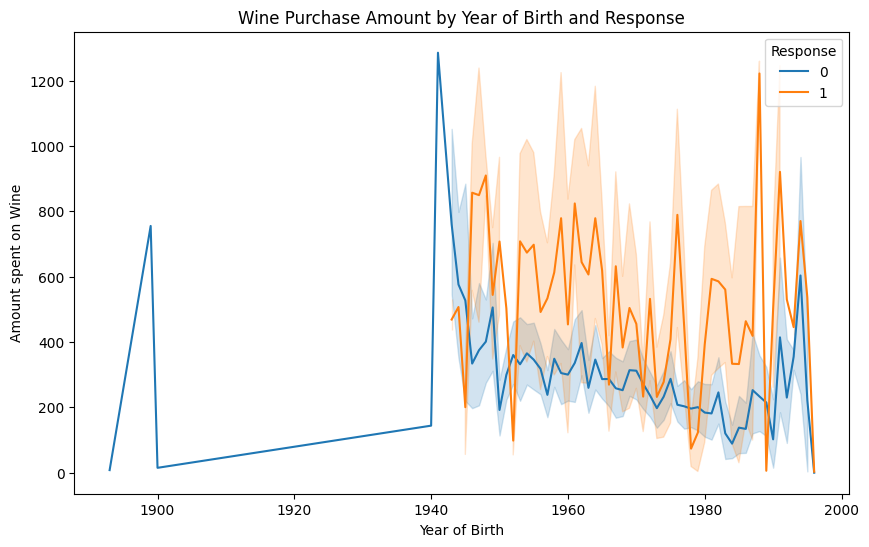

In [89]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year_Birth', y='MntWines', hue='Response')
plt.title('Wine Purchase Amount by Year of Birth and Response')
plt.xlabel('Year of Birth')
plt.ylabel('Amount spent on Wine')
plt.legend(title='Response')
plt.show()


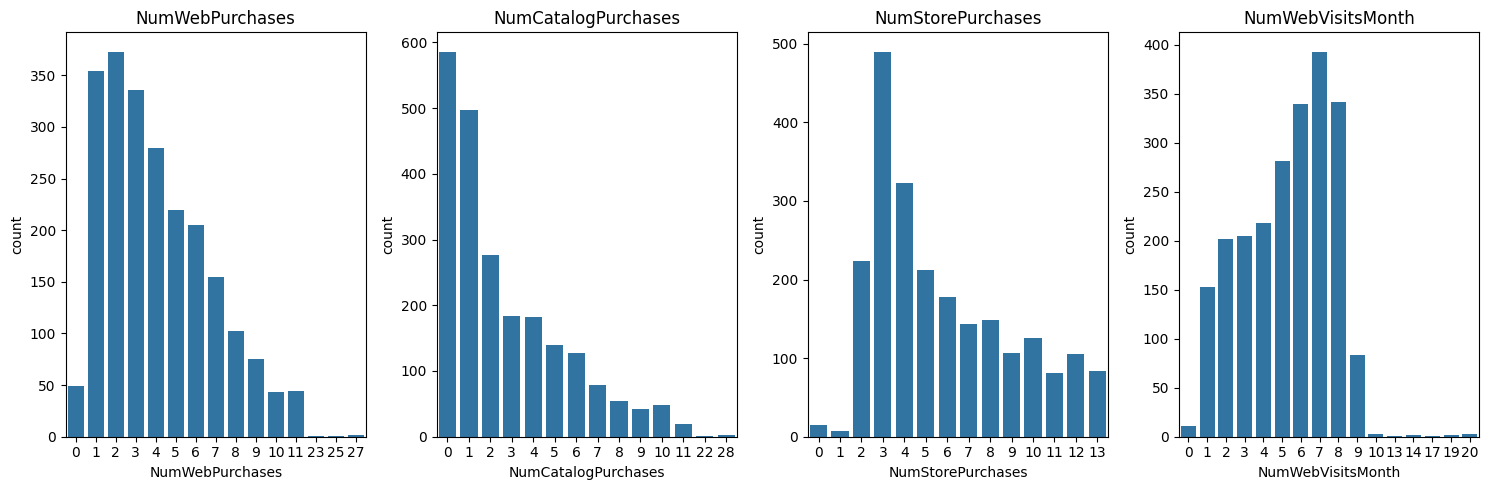

In [90]:
# Sütun grafiği için alt grafiklerin düzenlenmesi
plt.figure(figsize=(15, 5))

# NumWebPurchases için sütun grafiği
plt.subplot(1, 4, 1)
sns.countplot(data=data, x='NumWebPurchases')
plt.title('NumWebPurchases')

# NumCatalogPurchases için sütun grafiği
plt.subplot(1, 4, 2)
sns.countplot(data=data, x='NumCatalogPurchases')
plt.title('NumCatalogPurchases')

# NumStorePurchases için sütun grafiği
plt.subplot(1, 4, 3)
sns.countplot(data=data, x='NumStorePurchases')
plt.title('NumStorePurchases')

# NumWebVisitsMonth için sütun grafiği
plt.subplot(1, 4, 4)
sns.countplot(data=data, x='NumWebVisitsMonth')
plt.title('NumWebVisitsMonth')

plt.tight_layout()
plt.show()
